## Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
# Path to input file
input_file_path = '..\\2020_03_ActualGenerationOutputPerGenerationUnit_16.1.A.csv'

In [3]:
# Read the Excel file into a DataFrame
df = pd.read_csv(input_file_path, sep='\t')

# Understanding the data

In [4]:
df.head(5)

,DateTime,ResolutionCode,AreaCode,AreaTypeCode,AreaName,MapCode,GenerationUnitEIC,PowerSystemResourceName,ProductionType,ActualGenerationOutput,ActualConsumption,InstalledGenCapacity,UpdateTime
0,2020-03-04 17:00:00.000,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.0,NaN,100.0,2020-03-04 19:46:09
1,2020-03-04 18:00:00.000,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.0,NaN,100.0,2020-03-04 20:46:24
2,2020-03-04 19:00:00.000,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.0,NaN,100.0,2020-03-04 21:46:07
3,2020-03-04 20:00:00.000,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.0,NaN,100.0,2020-03-04 22:46:06
4,2020-03-04 21:00:00.000,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.0,NaN,100.0,2020-03-04 23:47:00


In [5]:
df.tail(5)

,DateTime,ResolutionCode,AreaCode,AreaTypeCode,AreaName,MapCode,GenerationUnitEIC,PowerSystemResourceName,ProductionType,ActualGenerationOutput,ActualConsumption,InstalledGenCapacity,UpdateTime
1479276,2020-03-14 04:00:00.000,PT60M,10YES-REE------0,CTA,ES CTA,ES,18WSLT3B--1234-V,SALLENT 3B,Hydro Pumped Storage,NaN,0.1,100.0,2020-03-15 13:35:43
1479277,2020-03-14 05:00:00.000,PT60M,10YES-REE------0,CTA,ES CTA,ES,18WSLT3B--1234-V,SALLENT 3B,Hydro Pumped Storage,NaN,0.1,100.0,2020-03-15 13:35:43
1479278,2020-03-14 06:00:00.000,PT60M,10YES-REE------0,CTA,ES CTA,ES,18WSLT3B--1234-V,SALLENT 3B,Hydro Pumped Storage,NaN,0.1,100.0,2020-03-15 13:35:43
1479279,2020-03-14 07:00:00.000,PT60M,10YES-REE------0,CTA,ES CTA,ES,18WSLT3B--1234-V,SALLENT 3B,Hydro Pumped Storage,NaN,0.1,100.0,2020-03-15 13:35:43
1479280,2020-03-14 08:00:00.000,PT60M,10YES-REE------0,CTA,ES CTA,ES,18WSLT3B--1234-V,SALLENT 3B,Hydro Pumped Storage,NaN,0.1,100.0,2020-03-15 13:35:43


In [7]:
df.info()

# Around 1.5M entries
# Key columns = Datetime, ActualGenerationOutput, ActualConsumption, and InstalledGenCapacity
# 3 columns contain numerical data
# Missing values present in ActualGenerationOutput and ActualConsumption

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479281 entries, 0 to 1479280
Data columns (total 13 columns):
DateTime                   1479281 non-null object
ResolutionCode             1479281 non-null object
AreaCode                   1479281 non-null object
AreaTypeCode               1479281 non-null object
AreaName                   1479281 non-null object
MapCode                    1479281 non-null object
GenerationUnitEIC          1479281 non-null object
PowerSystemResourceName    1479281 non-null object
ProductionType             1479281 non-null object
ActualGenerationOutput     1438691 non-null float64
ActualConsumption          197574 non-null float64
InstalledGenCapacity       1479281 non-null float64
UpdateTime                 1479281 non-null object
dtypes: float64(3), object(10)
memory usage: 146.7+ MB


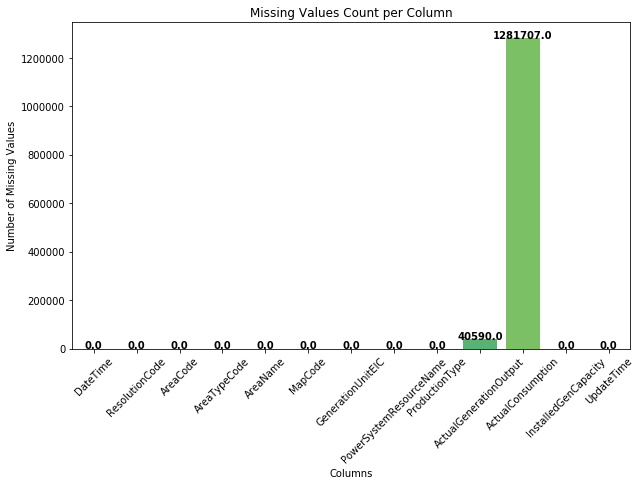

In [8]:
#Count of Missing values
missing_values_count = df.isnull().sum()
# Plotting the missing values count
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=missing_values_count.index, y=missing_values_count.values, palette="viridis")
plt.xticks(rotation=45)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values Count per Column')
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), bar.get_height(),
            horizontalalignment='center', color='black', weight='bold')
plt.show()

## Summary statistics

In [9]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # Set display options to exclude scientific notation
df.describe()


# Min value 0  indicates instances where no generation output, consumption and Capacity was recorded.
    #indicating potential issues with data recording or reporting (for eg: maintenance, downtime etc.)
# High values of standard deviation suggests the fields varies widely across different observations.
# Notable diff between third quartile (75th%) and max values, which suggest there can be outliers

,ActualGenerationOutput,ActualConsumption,InstalledGenCapacity
count,1438691.00,197574.00,1479281.00
mean,118.95,9.10,289.96
std,231.92,38.09,264.94
min,0.00,0.00,0.00
25%,0.00,0.00,118.50
50%,6.32,0.00,207.00
75%,138.73,0.00,385.00
max,1516.00,868.00,1500.00


In [10]:
for col in ["ActualGenerationOutput","ActualConsumption","InstalledGenCapacity"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    print(f'Column {col} has IQR= {Q3 - Q1}')

# ActualGenerationOutput  and InstalledGenCapacity shows greater variability in their central portion of the data

Column ActualGenerationOutput has IQR= 138.73
Column ActualConsumption has IQR= 0.0
Column InstalledGenCapacity has IQR= 266.5


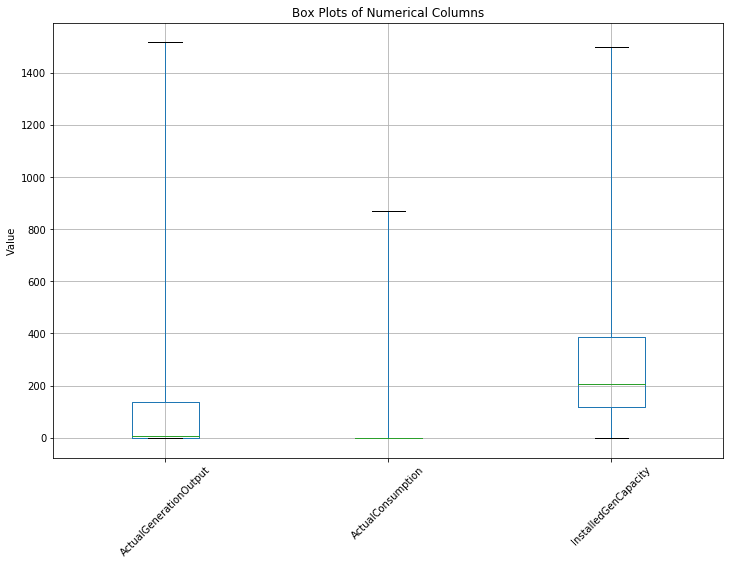

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df.boxplot(showfliers=False,whis=(0, 100))
plt.title("Box Plots of Numerical Columns")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()

# high width of box for InstalledGenCapacity means more dispersion
# The placement of boxes also indicates positive skewness. 
    #It means right tail (above 3rd quartile) of the distribution is stretched out

# Data Visualisation 

## To check missing values

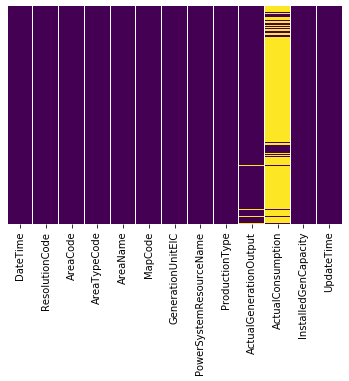

In [12]:
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

#The heatmap shows Null values in ActualGenerationOutput and ActualConsumption columns

## Correlation

In [13]:
corr= df.corr()
corr.style.background_gradient(cmap='coolwarm')
# Shows moderate to strong postive correlation between  ActualGenerationOutput and InstalledGenCapacity

,ActualGenerationOutput,ActualConsumption,InstalledGenCapacity
ActualGenerationOutput,1,-0.0560449,0.710404
ActualConsumption,-0.0560449,1,0.169362
InstalledGenCapacity,0.710404,0.169362,1


# Data Integrity

## Check for duplicate records

In [14]:
print(df.duplicated().sum())
#Shows the dataframe doesn't have duplicate records

0


## Poor data quality examples

In [15]:
#Check for any entries where DateTime is outside the expected range. This report is for March 2020

df['DateTime'] = pd.to_datetime(df['DateTime'])
entries_outside_march_2020 = df[(df['DateTime'] < '2020-03-01') | (df['DateTime'] >= '2020-04-01')]
print(entries_outside_march_2020)

#Shows the datetime is within expected range

Empty DataFrame
Columns: [DateTime, ResolutionCode, AreaCode, AreaTypeCode, AreaName, MapCode, GenerationUnitEIC, PowerSystemResourceName, ProductionType, ActualGenerationOutput, ActualConsumption, InstalledGenCapacity, UpdateTime]
Index: []


In [16]:
# Identify Poor Data Quality Examples
Consumption_Null_Dates = df[df['ActualConsumption'].isnull()]['DateTime']

In [17]:
Consumption_Null_Dates[:20]

#This may suggest that on these dates the Generation Unit might be down or shut for maintenance

0    2020-03-04 17:00:00
1    2020-03-04 18:00:00
2    2020-03-04 19:00:00
3    2020-03-04 20:00:00
4    2020-03-04 21:00:00
5    2020-03-06 12:00:00
6    2020-03-06 13:00:00
7    2020-03-15 11:00:00
8    2020-03-15 12:00:00
9    2020-03-15 13:00:00
10   2020-03-15 14:00:00
11   2020-03-15 15:00:00
12   2020-03-15 16:00:00
13   2020-03-15 17:00:00
14   2020-03-24 12:00:00
15   2020-03-23 22:00:00
16   2020-03-23 23:00:00
17   2020-03-24 00:00:00
18   2020-03-24 01:00:00
19   2020-03-24 02:00:00
Name: DateTime, dtype: datetime64[ns]

In [18]:
df[(df['ActualConsumption'].isnull()) & (df['GenerationUnitEIC']== '36W-TE-KAKANJ6-7')]#['DateTime'][:20]

,DateTime,ResolutionCode,AreaCode,AreaTypeCode,AreaName,MapCode,GenerationUnitEIC,PowerSystemResourceName,ProductionType,ActualGenerationOutput,ActualConsumption,InstalledGenCapacity,UpdateTime
0,2020-03-04 17:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 19:46:09
1,2020-03-04 18:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 20:46:24
2,2020-03-04 19:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 21:46:07
3,2020-03-04 20:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 22:46:06
4,2020-03-04 21:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 23:47:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8101,2020-03-04 12:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 14:47:31
8102,2020-03-04 13:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 15:46:08
8103,2020-03-04 14:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 16:34:47
8104,2020-03-04 15:00:00,PT60M,10YBA-JPCC-----D,CTA,BA CTA,BA,36W-TE-KAKANJ6-7,TE_KAKANJ_G6,Fossil Hard coal,0.00,nan,100.00,2020-03-04 17:46:19


In [19]:
df[(df['ActualConsumption'].notnull()) & (df['GenerationUnitEIC']== '36W-TE-KAKANJ6-7')]

#Rows where Consumption is not null and Generation Unit = 36W-TE-KAKANJ6-7
#This means there are no dates for which there is consumption recorded for this particular unit

#There might be other such units

,DateTime,ResolutionCode,AreaCode,AreaTypeCode,AreaName,MapCode,GenerationUnitEIC,PowerSystemResourceName,ProductionType,ActualGenerationOutput,ActualConsumption,InstalledGenCapacity,UpdateTime


In [21]:
grouped = df.groupby('GenerationUnitEIC')

# Filter the groups to find those where all values in ActualConsumption are null
groups_with_all_null = grouped.filter(lambda x: x['ActualConsumption'].isnull().all())

# Display the groups with all null ActualConsumption
print(len(groups_with_all_null['GenerationUnitEIC'].unique()))
print(groups_with_all_null['GenerationUnitEIC'].unique())

#There are 1444 such Units whose consumption is null for all dates.
#These are redundant data and could be avoided
#potential issues with data recording or reporting

1444
['36W-TE-KAKANJ6-7' '36W-H-CAPLJ-G2-H' '36W-TE-UGLJEV1-5' ...
 '18WCOM4-12345-D2' '18WMUE1-12345-FP' '18WPALOS1-123-CB']


## A similar Analysis could be done for ActualGenerationOutput

In [22]:
Generation_Null_Dates = df[df['ActualGenerationOutput'].isnull()]['DateTime']
print(Generation_Null_Dates)

233416    2020-03-30 22:00:00
233417    2020-03-30 23:00:00
233418    2020-03-31 00:00:00
233419    2020-03-31 01:00:00
233420    2020-03-31 02:00:00
                  ...        
1479276   2020-03-14 04:00:00
1479277   2020-03-14 05:00:00
1479278   2020-03-14 06:00:00
1479279   2020-03-14 07:00:00
1479280   2020-03-14 08:00:00
Name: DateTime, Length: 40590, dtype: datetime64[ns]


In [23]:
grouped = df.groupby('GenerationUnitEIC')

# Filter the groups to find those where all values in ActualConsumption are null
groups_with_all_null = grouped.filter(lambda x: x['ActualGenerationOutput'].isnull().all())

# Display the groups with all null ActualConsumption
print(len(groups_with_all_null['GenerationUnitEIC'].unique()))
print(groups_with_all_null['GenerationUnitEIC'].unique())

# 28 Units for which no Generation Output value found for any of the dates

28
['17W100P100P0108P' '17W100P100P0126N' '17W100P100P0127L'
 '17W100P100P0140T' '17W100P100P0023X' '18WMUE6B-12345-U'
 '18WTJE2B-12345-0' '18WSLT3B--1234-V' '18WVRN6B-12345-Z'
 '18WVRN1B-12345-B' '18WSLT1B-12345-J' '18WMUE5B-12345-3'
 '18WSLT2B-12345-9' '18WMUE4B-12345-D' '18WTJE1B-12345-A'
 '18WMUE7B-12345-K' '18WTJE3B-12345-R' '18WMUE1B-12345-6'
 '18WVRN5B-12345-8' '18WAL22B-12345-M' '18WMUE2B-12345-X'
 '18WVRN2B-12345-1' '18WVRN3B-12345-S' '18WVRN4B-12345-I'
 '18WTJE4B-12345-H' '18WSLT4B-12345-Q' '18WMUE3B-12345-N'
 '18WAL21B-12345-W']


# Data Quality Metrics

## 1. Completeness
     
     measures the number of records with incomplete data. It is tracked by identifying records with empty fields and calculated as a percentage of the total number of records.
     
     completeness = 1 - (df.isnull().sum() / len(df))
     
     This metric is very important to ensure that we have sufficient data for further analysis and ML.

## 2. Accuracy

    Accuracy measures number and types of errors in a data set. To measure accuracy data has to be compared to a reference data set. The check could validate all the categorical fields in our dataset. It can also be used to find presence of outliers in numerical columns (using IQR values or clustering techniques) .
    
    Accuracy is measured as percentage of errors to the total number of records.
    
    This metric ensures that data is close to true values.

## 3. Uniqueness

    This tracks duplicate data. Redundant data is always a headache for analysis and ML. It’s important to identify duplicates and either merge them or delete the duplicates. 

## 4. Consistency

    Ensures that data is consistent across different sources or time periods. Can check for consistency in categorical variables like ResolutionCode and AreaTypeCode over time.
    
    Inconsistent values may indicate errors in data entry or changes in data collection methods.

## 5. Timeliness

    a metric that measures the age of data in a database. More current data are likely to be more accurate and relevant.
    Old data could mutliply errors while moving through pipeline.
    
    Evaluate the timeliness of our data updates by analyzing the frequency of updates in the UpdateTime column.
    
    Timely data is essential for real-time decision-making and feeds as a proper relevant data for Models.